## REF 
- https://medium.com/@saxenarohan97/intro-to-tensorflow-solving-a-simple-regression-problem-e87b42fd4845

In [1]:
# OP
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

# DL 
import tensorflow as tf

/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
# LOAD THE DATA 
total_features, total_prices = load_boston(True)

# SPLIT TO TRAIN, VALIDATION, TEST SET 

# Keep 300 samples for training
train_features = scale(total_features[:300])
train_prices = total_prices[:300]

# Keep 100 samples for validation
valid_features = scale(total_features[300:400])
valid_prices = total_prices[300:400]

# Keep remaining samples as test set
test_features = scale(total_features[400:])
test_prices = total_prices[400:]

In [3]:
# sample X train data 
train_features[:3]

array([[ -6.41131126e-01,   1.00803985e-01,  -1.03067021e+00,
         -3.14485451e-01,   2.17757002e-01,   2.19427174e-01,
          8.26098070e-02,  -9.55971610e-02,  -2.15826599e+00,
         -2.32544281e-01,  -1.00268807e+00,   4.20545707e-01,
         -9.23483688e-01],
       [ -6.09771235e-01,  -5.93509179e-01,  -2.83216038e-01,
         -3.14485451e-01,  -4.17103062e-01,   9.45806783e-04,
          5.53520080e-01,   3.48016313e-01,  -1.53926045e+00,
         -1.01526137e+00,   9.27468208e-02,   4.20545707e-01,
         -2.52348069e-01],
       [ -6.09801116e-01,  -5.93509179e-01,  -2.83216038e-01,
         -3.14485451e-01,  -4.17103062e-01,   1.08484038e+00,
         -5.83195447e-02,   3.48016313e-01,  -1.53926045e+00,
         -1.01526137e+00,   9.27468208e-02,   3.26456136e-01,
         -1.07674783e+00]])

In [4]:
# sample y train data 
train_prices[:3]

array([ 24. ,  21.6,  34.7])

In [5]:
print ('train X dataset shape',train_features.shape)
print ('train y dataset shape',train_prices.shape )

train X dataset shape (300, 13)
train y dataset shape (300,)


In [6]:
# DEFINE THE VARIABLES 
# y= x*w + b 

# 1) weight (w) size : [data_feature_size, output_size]
# tf.truncated_normal() as an initial value, which generates a regularised set of numbers from the normal probability distribution
# or you can use tf.zeros as well -> i.e. weights = tf.Variable(tf.zeros([13, 1]))
w = tf.Variable(tf.truncated_normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float64))

# 2) bias size : [output_size]
# select tf.float64 as bias dtype here 
b = tf.Variable(tf.zeros(1, dtype = tf.float64))

In [7]:
# HELP FUNC 

def calc(x, y):
# Returns predictions and error
    predictions = tf.add(b, tf.matmul(x, w))
    error = tf.reduce_mean(tf.square(y - predictions))
    return [ predictions, error ]

In [8]:
# SET UP THE CALCULATE, SUPER PARAMETERS 

y, cost = calc(train_features, train_prices)
# Feel free to tweak these 2 values:
learning_rate = 0.025
epochs = 4000
output = [[], []] # get the model train history 

In [9]:
# INIT THE VARIABLES  AND THE optimizer
init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


epoch :  0 error :  674.126572021
epoch :  100 error :  78.7809378976
epoch :  200 error :  78.7308532861
epoch :  300 error :  78.7267577737
epoch :  400 error :  78.7257308126
epoch :  500 error :  78.7254294655
epoch :  600 error :  78.7253382191
epoch :  700 error :  78.7253104234
epoch :  800 error :  78.7253019452
epoch :  900 error :  78.7252993584
epoch :  1000 error :  78.725298569
epoch :  1100 error :  78.725298328
epoch :  1200 error :  78.7252982545
epoch :  1300 error :  78.7252982321
epoch :  1400 error :  78.7252982252
epoch :  1500 error :  78.7252982231
epoch :  1600 error :  78.7252982225
epoch :  1700 error :  78.7252982223
epoch :  1800 error :  78.7252982222
epoch :  1900 error :  78.7252982222
epoch :  2000 error :  78.7252982222
epoch :  2100 error :  78.7252982222
epoch :  2200 error :  78.7252982222
epoch :  2300 error :  78.7252982222
epoch :  2400 error :  78.7252982222
epoch :  2500 error :  78.7252982222
epoch :  2600 error :  78.7252982222
epoch :  2700 e

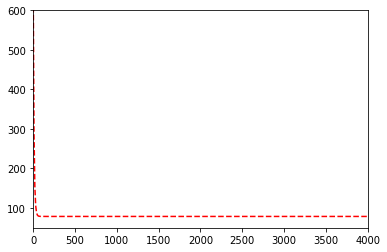

Validation error = 104.343677778 

Test error = 123.333573476 



In [10]:
# TRAIN THE MODEL 

with tf.Session() as sess:

    sess.run(init)

    for i in list(range(epochs)):

        sess.run(optimizer)

        if i % 10 == 0.:
            output[0].append(i+1)
            output[1].append(sess.run(cost))

        if i % 100 == 0:
            print('epoch : ',i ,'error : ', sess.run(cost))

    plt.plot(output[0], output[1], 'r--')
    plt.axis([0, epochs, 50, 600])
    plt.show()

    valid_cost = calc(valid_features, valid_prices)[1]

    print('Validation error =', sess.run(valid_cost), '\n')

    test_cost = calc(test_features, test_prices)[1]

    print('Test error =', sess.run(test_cost), '\n')